## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/study_results.csv")

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Study data files
group_by_regimen=combined_data.groupby("Drug Regimen")
print(group_by_regimen)
count_group_by_regimen=group_by_regimen.count().head(10)
count_group_by_regimen

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_by_regimen=combined_data.groupby("Drug Regimen")


group_mean = group_by_regimen["Tumor Volume (mm3)"].mean()
group_median = group_by_regimen["Tumor Volume (mm3)"].median()
group_var = group_by_regimen["Tumor Volume (mm3)"].var()
group_sem = group_by_regimen["Tumor Volume (mm3)"].sem()
group_std = group_by_regimen["Tumor Volume (mm3)"].std()


group_analysis=pd.DataFrame({
                        "Tumor Volume Mean (mm3)": group_mean,
                        "Tumor Volume Median(mm3)": group_median,
                        "Tumor Volume VAR(mm3)": group_var,
                        "Tumor Volume SEM(mm3)" : group_sem,
                        "Tumor Volume STD(mm3)" : group_std
                        })
group_analysis.head(40)

,Tumor Volume Mean (mm3),Tumor Volume Median(mm3),Tumor Volume VAR(mm3),Tumor Volume SEM(mm3),Tumor Volume STD(mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.322552,50.854632,42.351070,0.512884,6.507770
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


## Bar plots

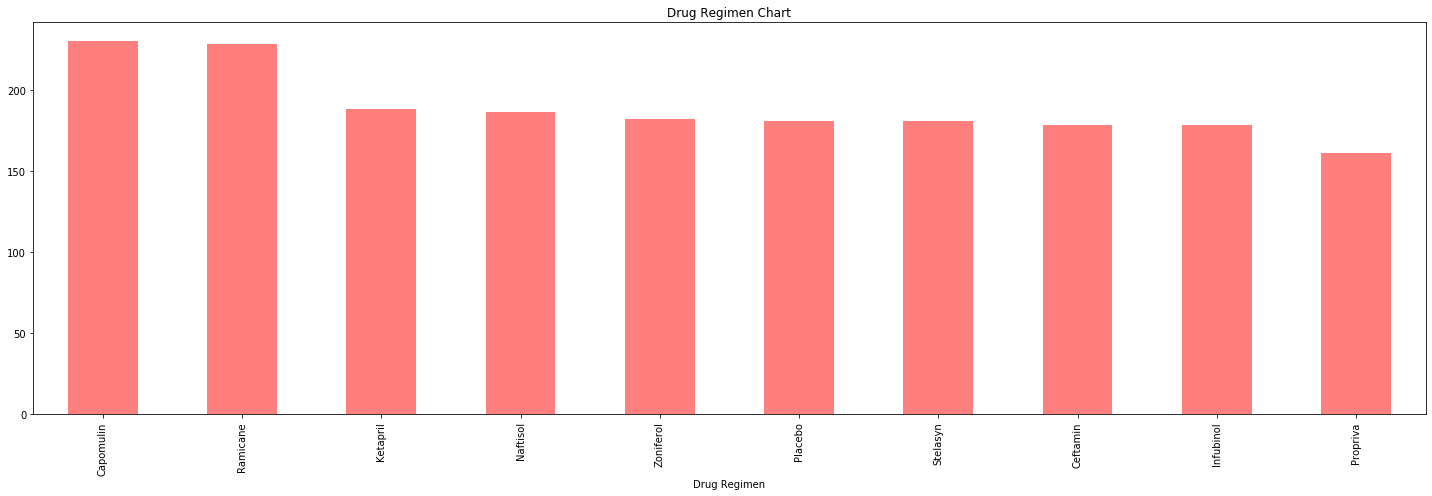

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_regimen_bar =combined_data[['Drug Regimen','Mouse ID']].groupby(['Drug Regimen']).count().reset_index()
drug_regimen_bar = drug_regimen_bar.set_index('Drug Regimen')

fig, ax = plt.subplots(figsize=(20,7))

drug_regimen_bar.sort_values(by='Mouse ID', ascending=False).plot.bar(color="r", alpha=0.5, ax=ax,legend=False)
ax.set(title="Drug Regimen Chart")
fig.tight_layout()


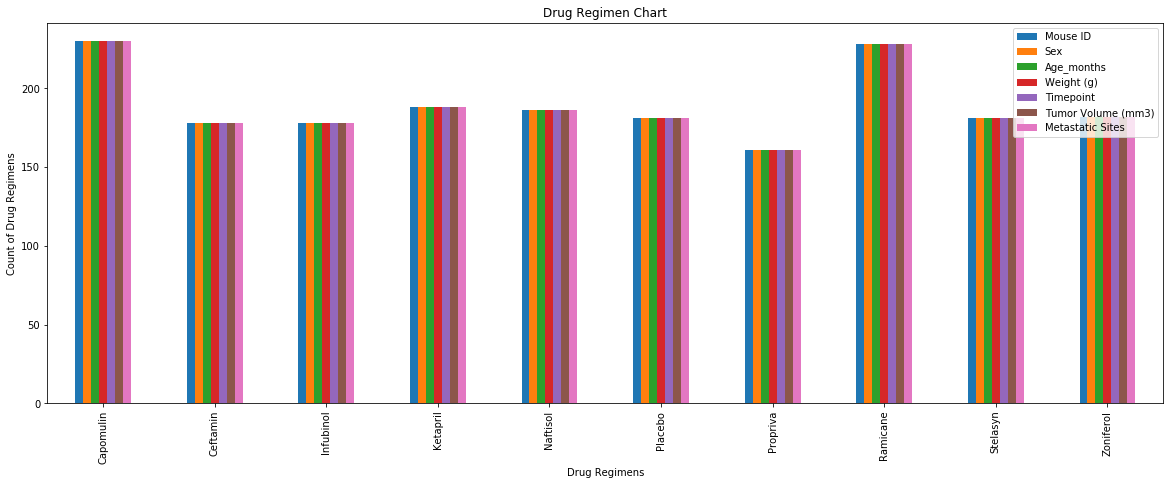

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(combined_data))
tick_locations = [value for value in x_axis]

# Create a bar chart based off of the group series from before
drug_regimen_bar = count_group_by_regimen.plot(kind='bar', figsize=(20,7))

# Set the xlabel and ylabel using class methods
drug_regimen_bar.set_xlabel("Drug Regimens")
drug_regimen_bar.set_ylabel("Count of Drug Regimens")
drug_regimen_bar.set_title("Drug Regimen Chart")
plt.show()
plt.tight_layout()

## Pie plots

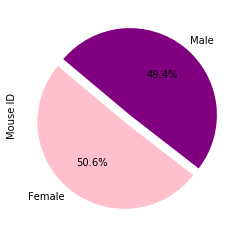

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group_by_regimen = combined_data[['Sex','Mouse ID']].groupby(['Sex']).count().reset_index()

colors = ["pink", "purple"]
explode=(0.1,0)
fig, ax = plt.subplots()
gender_group_by_regimen.sort_values(by='Mouse ID',ascending=False).plot.pie(ax=ax,y = 'Mouse ID', autopct='%1.1f%%',  startangle=140, shadow=False,explode=explode, labels=gender_group_by_regimen['Sex'], legend = False, fontsize=10, colors=colors)

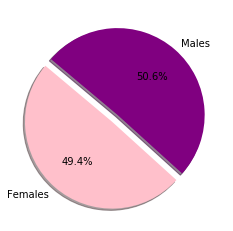

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplotgender_pie= gender_group_by_regimen['Mouse ID'].to_list()
gender_pie= gender_group_by_regimen['Mouse ID'].to_list()
labels = ["Females", "Males"]
plt.pie(gender_pie, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,explode=explode, startangle=140)

plt.show()

## Line and scatter plots

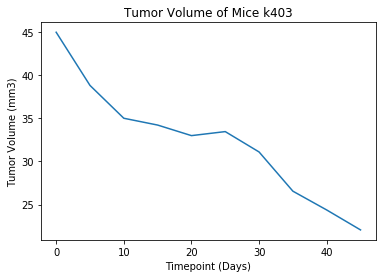

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_chart = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin", :]
line_plot = combined_data.loc[combined_data["Mouse ID"] == "k403", :]

x_axis= line_plot["Timepoint"]
points= line_plot["Tumor Volume (mm3)"]

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume of Mice k403')

plt.plot(x_axis, points)
plt.show()

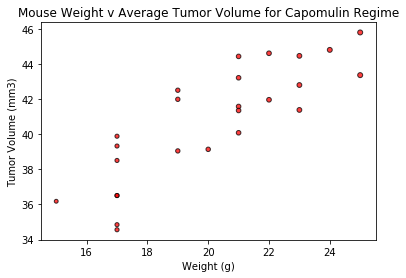

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_chart = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin", :]

# use data above to calculate the average of the tumor based on each mouse- mean of the mouse id

scatter_plot=capomulin_chart.groupby(['Mouse ID']).mean()

x_axis= scatter_plot['Weight (g)']
data= scatter_plot['Tumor Volume (mm3)']

plt.title("Mouse Weight v Average Tumor Volume for Capomulin Regime")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,data)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
